# Movie Genre Classification

<!--By JIBIN K-->

Task:

Create a machine learning model that can predict the genre of a movie based on its plot summary or other textual information. You can use techniques like TF-IDF or word embeddings with classifiers such as Naive Bayes, Logistic Regression, or Support Vector Machines.

## Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

import string 
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load the Dataset

In [2]:
file_path1 = r"D:\CodSoft\CODSOFT\Task 1\train_data.txt"
tr_data = pd.read_csv(file_path1, sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")

## Inspect the train data

In [3]:
print("data shape:", tr_data.shape)
print("---"*30)
print("Dataset variables:", tr_data.columns.to_list())
print("---"*30)
print("Data info: \n"); print(tr_data.info())
print("---"*30)
print("Data description: \n", tr_data.describe(include='all').T)
print("---"*30)
print("Data head:\n", tr_data.head())
print("---"*30)
print("Data tail:\n", tr_data.tail())

data shape: (54214, 3)
------------------------------------------------------------------------------------------
Dataset variables: ['TITLE', 'GENRE', 'DESCRIPTION']
------------------------------------------------------------------------------------------
Data info: 

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54214 non-null  object
 1   GENRE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None
------------------------------------------------------------------------------------------
Data description: 
              count unique                                                top  \
TITLE        54214  54214                      Oscar et la dame rose (2009)    
GENRE        54214     27                                             drama    
DESCRIPTION  54214  54086

In [4]:
# Checking for missing values
tr_data.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

- No missing values.

In [5]:
# Checking duplicates
tr_data.duplicated().value_counts()

False    54214
Name: count, dtype: int64

- No duplicate values

## Exploratory Data Analysis

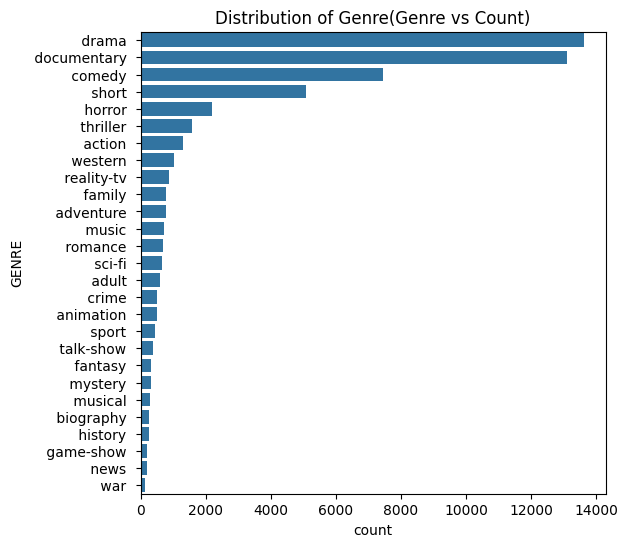

In [6]:
plt.figure(figsize=(6,6))
sns.countplot(data=tr_data, y="GENRE", order= tr_data["GENRE"].value_counts().index)
plt.title("Distribution of Genre(Genre vs Count)")
plt.show()

- Drama and Documentary are more in counts

# Data preprocessing

In [7]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([stemmer.stem(i) for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()
    return text

tr_data["TextCleaning"] = tr_data["DESCRIPTION"].apply(cleaning_data)

- Converted text to lowercase
- Removed URLs, special characters, and punctuation
- Tokenized text, removed stopwords, and applied stemming using NLTK
- Cleaned text was stored in a new column 

In [8]:
# Checking data after preprocessing
print(tr_data.head())

                                TITLE       GENRE  \
1       Oscar et la dame rose (2009)       drama    
2                       Cupid (1997)    thriller    
3   Young, Wild and Wonderful (1980)       adult    
4              The Secret Sin (1915)       drama    
5             The Unrecovered (2007)       drama    

                                         DESCRIPTION  \
1   Listening in to a conversation between his do...   
2   A brother and sister with a past incestuous r...   
3   As the bus empties the students for their fie...   
4   To help their unemployed father make ends mee...   
5   The film's title refers not only to the un-re...   

                                        TextCleaning  
1  list convers doct par year old osc learn nobod...  
2  broth sist past incestu rel cur murd rel murd ...  
3  bus empty stud field trip muse nat hist littl ...  
4  help unemploy fath mak end meet edi twin sist ...  
5  film titl ref recov body ground zero also stat...  


## Using TF-IDF to vectorize the data

In [9]:
vectorize = TfidfVectorizer()
X_train = vectorize.fit_transform(tr_data["TextCleaning"])

In [10]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2515666 stored elements and shape (54214, 72981)>
  Coords	Values
  (0, 36997)	0.12947263305174875
  (0, 13317)	0.13665402063171336
  (0, 16950)	0.11739570422815436
  (0, 47641)	0.09488486189017827
  (0, 71820)	0.06352274884495433
  (0, 46116)	0.07533218514980777
  (0, 46662)	0.3242572482888047
  (0, 36065)	0.09359491901345605
  (0, 45083)	0.1528363697587846
  (0, 13727)	0.13559684693749668
  (0, 63906)	0.08773188728230391
  (0, 70212)	0.11313765875171763
  (0, 37056)	0.12471035465658507
  (0, 22854)	0.1598145959754476
  (0, 52734)	0.12156710852070639
  (0, 60327)	0.12482069439532656
  (0, 2638)	0.1297887864821196
  (0, 20060)	0.13835716170876705
  (0, 61475)	0.14465806115675717
  (0, 63282)	0.1103583182700968
  (0, 54335)	0.2800539187102145
  (0, 35327)	0.12288542774732801
  (0, 49233)	0.18011416039359712
  (0, 40498)	0.08121099167994503
  (0, 28403)	0.12277938909457164
  :	:
  (54213, 44114)	0.14861505214292184
  (54213, 3

## Data and Target selection

In [11]:
X = X_train
y = tr_data["GENRE"]

## Split the data into train data and test data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
print(f"X train shape: {X_train.shape}\nX test shape: {X_test.shape}\ny tarin shpae: {y_train.shape}\ny test shepe: {y_test.shape}")

X train shape: (43371, 72981)
X test shape: (10843, 72981)
y tarin shpae: (43371,)
y test shepe: (10843,)


## Model Comparison

In [13]:
models = {
    "Support Vector Machine": SVC(),
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Dictionary to store results
model_scores = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_scores[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Find the best model
best_model_name = max(model_scores, key=model_scores.get)
best_accuracy = model_scores[best_model_name]

print("\nBest Model:")
print(f"{best_model_name} with accuracy: {best_accuracy:.4f}")

Support Vector Machine Accuracy: 0.5735
Naive Bayes Accuracy: 0.4374
Logistic Regression Accuracy: 0.5818

Best Model:
Logistic Regression with accuracy: 0.5818


In [14]:
results_df = pd.DataFrame(list(model_scores.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\nModel Comparison:")
print(results_df)


Model Comparison:
                    Model  Accuracy
2     Logistic Regression  0.581758
0  Support Vector Machine  0.573550
1             Naive Bayes  0.437425


## Best model

In [15]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.5817578161025546


In [17]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

      action        0.56      0.27      0.36       263
       adult        0.84      0.28      0.42       112
   adventure        0.42      0.13      0.20       139
   animation        0.56      0.05      0.09       104
   biography        0.00      0.00      0.00        61
      comedy        0.53      0.59      0.56      1443
       crime        0.50      0.02      0.04       107
 documentary        0.67      0.84      0.74      2659
       drama        0.53      0.79      0.64      2697
      family        0.48      0.07      0.12       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.88      0.38      0.53        40
     history        0.00      0.00      0.00        45
      horror        0.66      0.60      0.63       431
       music        0.68      0.45      0.54       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

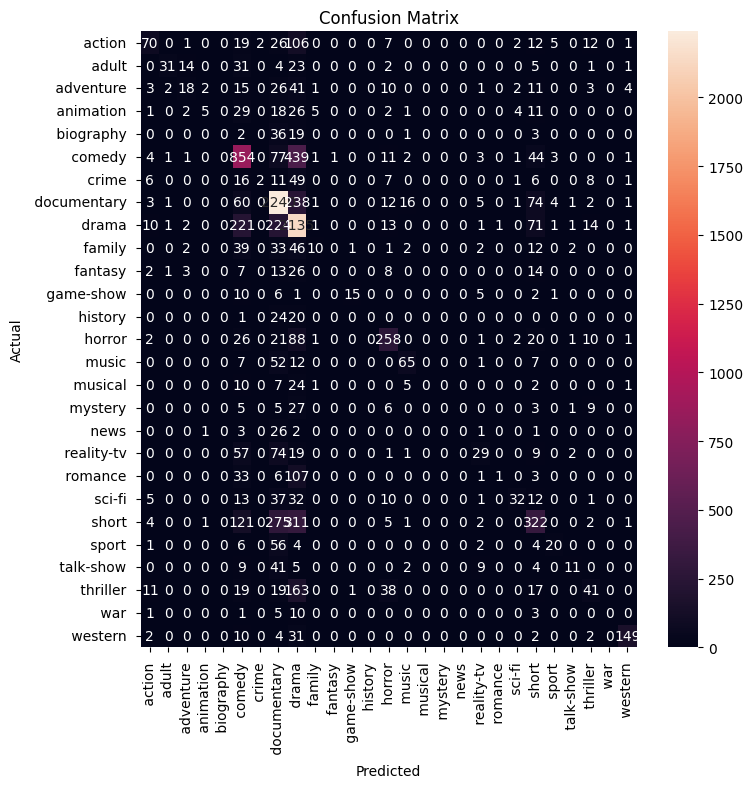

In [18]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()